# Final Project: Part 2
This notebook will create a 'first pass' model on the `winequality_red` data set and look for ways to improve it  



In [3]:
# importing modules

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

# Importing the dataset and looking at the Data


In [4]:
wine_df = pd.read_csv('../final_project/winequality-red.csv')

In [5]:
#Quick look at the data
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
# checking for NaN values
wine_df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
# Checking distribution of target col
wine_df.loc[:, 'quality'].value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

# Determining Target and Feature Variables

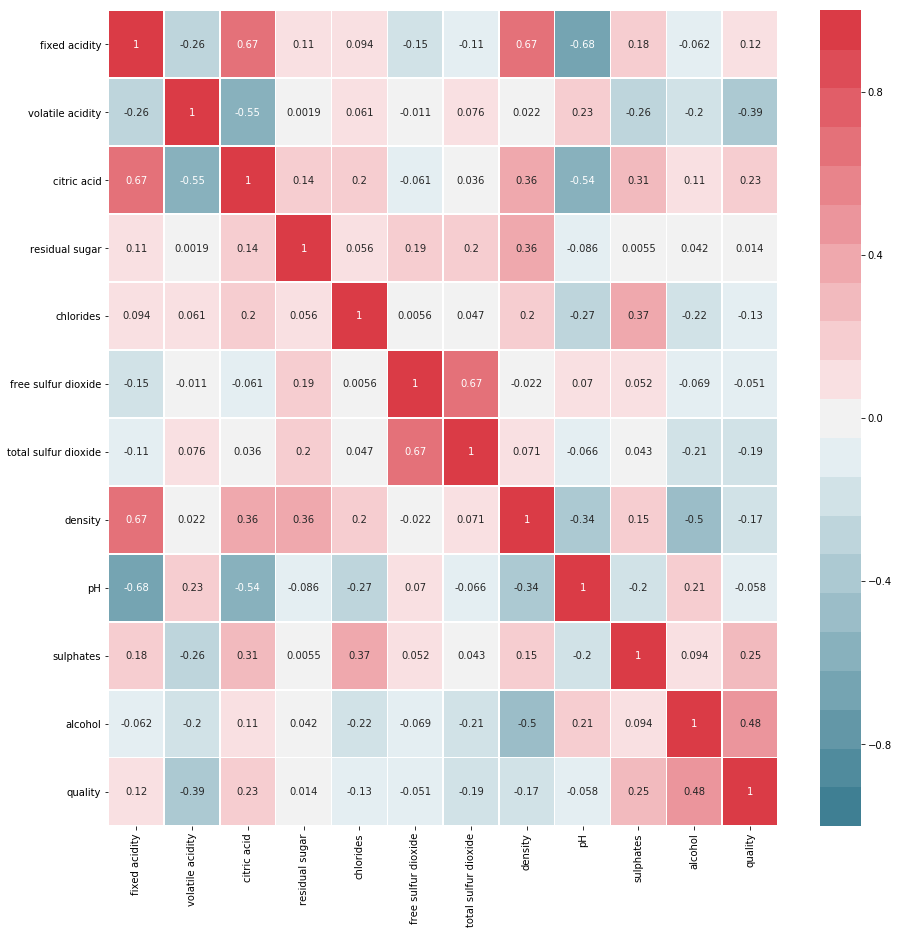

In [9]:
# Using a heatmap to visualize how the target column is 
# correlated to potential feature cols

fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(wine_df.corr(), ax=ax, linewidths=.5, annot=True, vmin=-1, vmax=1, cmap=sns.diverging_palette(220, 10, n=21))

The goal is to understand how the feature variables correlate to the target variable, 'quality'. Analyzing the heatmap it is evident that __volatile acidity, citric acid, total sulfur dioxide, sulfates, and alcohol__ are the variables most correlated with the target variable. 

_Question:_ Is this the best way to choose feature variables?

In [10]:
# Creating target/feature columns

target_col = ['quality']
feature_col = ['volatile acidity', 'citric acid', 'total sulfur dioxide', 'sulphates', 'alcohol']

X = wine_df.loc[:, feature_col]
y = wine_df.loc[:,target_col]

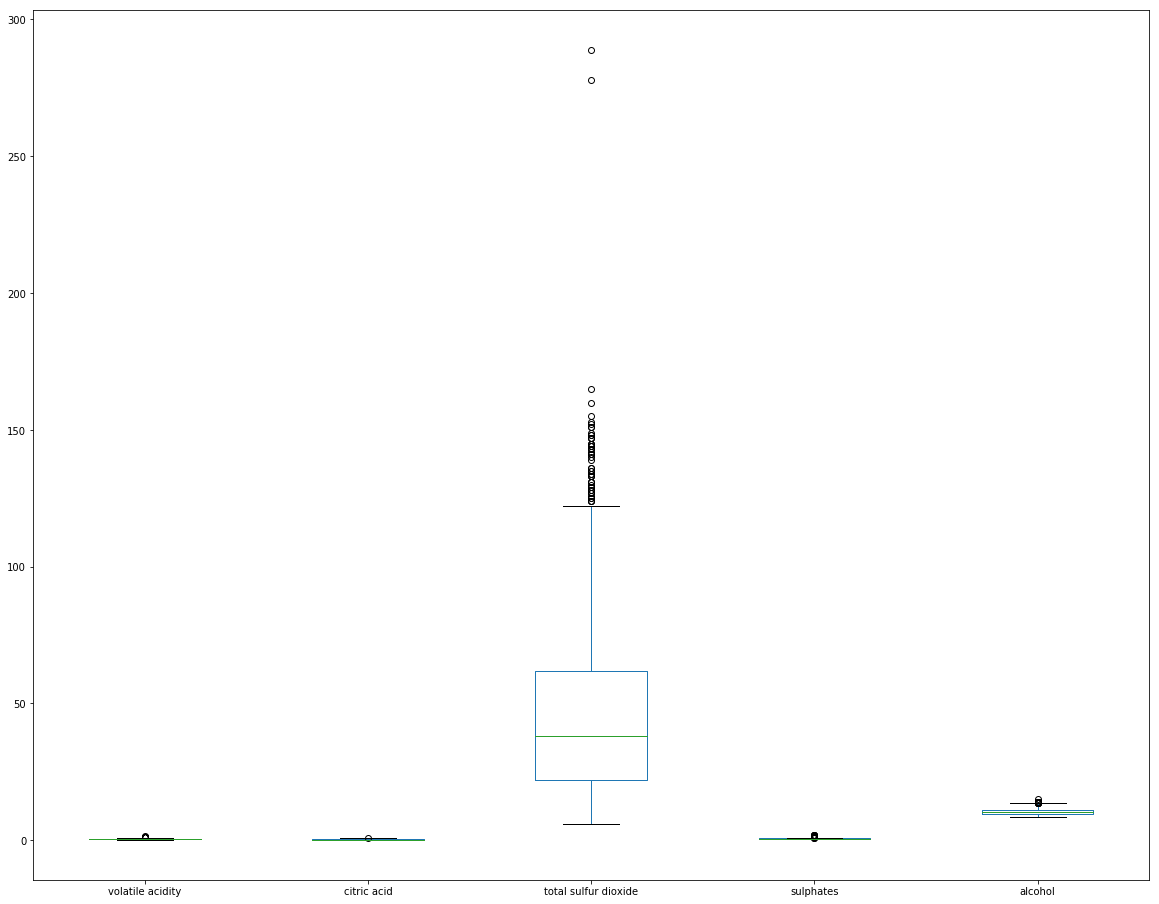

In [29]:
# Checking the feature vars. for outliers with a boxplot
# Should I get rid of the outliers in 'total sulphur dioxide'? 

ax = X.plot(figsize=(20,16), kind='box')

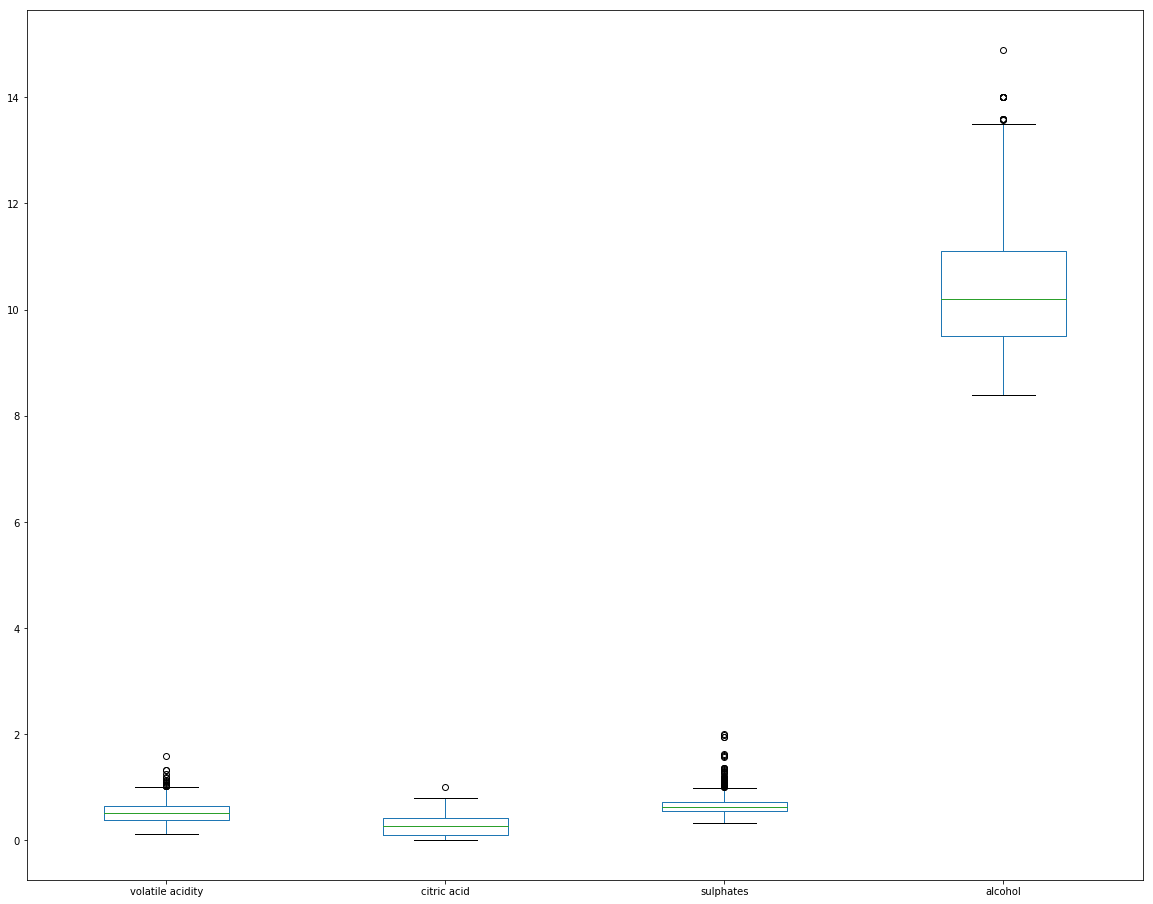

In [13]:
ax = wine_df.loc[:, ['volatile acidity', 'citric acid', 'sulphates', 'alcohol']].plot(figsize=(20,16), kind='box')

In [24]:
# dealing with outliers in 'total sulfur dioxide'
wine_df = wine_df.loc[wine_df.loc[:, 'total sulfur dioxide']<200,:]
wine_df.sort_values('total sulfur dioxide', ascending=False)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
354,6.1,0.210,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9,6
1244,5.9,0.290,0.25,13.4,0.067,72.0,160.0,0.99721,3.33,0.54,10.3,6
651,9.8,0.880,0.25,2.5,0.104,35.0,155.0,1.00100,3.41,0.67,11.2,5
109,8.1,0.785,0.52,2.0,0.122,37.0,153.0,0.99690,3.21,0.69,9.3,5
684,9.8,0.980,0.32,2.3,0.078,35.0,152.0,0.99800,3.25,0.48,9.4,5
672,9.8,1.240,0.34,2.0,0.079,32.0,151.0,0.99800,3.15,0.53,9.5,5
515,8.5,0.655,0.49,6.1,0.122,34.0,151.0,1.00100,3.31,1.14,9.3,5
591,6.6,0.390,0.49,1.7,0.070,23.0,149.0,0.99220,3.12,0.50,11.5,6
649,6.7,0.420,0.27,8.6,0.068,24.0,148.0,0.99480,3.16,0.57,11.3,6
15,8.9,0.620,0.19,3.9,0.170,51.0,148.0,0.99860,3.17,0.93,9.2,5


# First Model Run 

In [30]:
# train-test-split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=16)

In [31]:
# Training the model

from sklearn.linear_model import LinearRegression
lr_wine = LinearRegression()
lr_wine.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
# Scoring the Model with test set

print('Training-set R^2:', lr_wine.score(X_train, y_train))
print('Test-set R^2:', lr_wine.score(X_test, y_test))

Training-set R^2: 0.35085495845271647
Test-set R^2: 0.3153173454566248


Since both the training and test R-squared values are low, the model seems to be __underfitting__ the data. The model needs greater flexibility to capture more of the shape of the data. 

In [38]:
# Looking at MSE and MAE to eventually compare models

y_pred = lr_wine.predict(X_test)

from sklearn import metrics

print('Test set MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('Test set MSE:', metrics.mean_squared_error(y_test, y_pred))


# To be honest, I don't really understand how to interpret this. 
# Do I just do this for different feature variales and compare 
# which one gets a higher result? 

Test set MAE: 0.5128108569833398
Test set MSE: 0.4316881344230072


# Deeper look into Variables

In [34]:
wine_df.loc[:,feature_col].describe()

,volatile acidity,citric acid,total sulfur dioxide,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.527821,0.270976,46.467792,0.658149,10.422983
std,0.179060,0.194801,32.895324,0.169507,1.065668
min,0.120000,0.000000,6.000000,0.330000,8.400000
25%,0.390000,0.090000,22.000000,0.550000,9.500000
50%,0.520000,0.260000,38.000000,0.620000,10.200000
75%,0.640000,0.420000,62.000000,0.730000,11.100000
max,1.580000,1.000000,289.000000,2.000000,14.900000


In [35]:
# Get the correlation of all variables
wine_df.loc[:,(target_col + feature_col)].corr()

,quality,volatile acidity,citric acid,total sulfur dioxide,sulphates,alcohol
quality,1.000000,-0.390558,0.226373,-0.185100,0.251397,0.476166
volatile acidity,-0.390558,1.000000,-0.552496,0.076470,-0.260987,-0.202288
citric acid,0.226373,-0.552496,1.000000,0.035533,0.312770,0.109903
total sulfur dioxide,-0.185100,0.076470,0.035533,1.000000,0.042947,-0.205654
sulphates,0.251397,-0.260987,0.312770,0.042947,1.000000,0.093595
alcohol,0.476166,-0.202288,0.109903,-0.205654,0.093595,1.000000


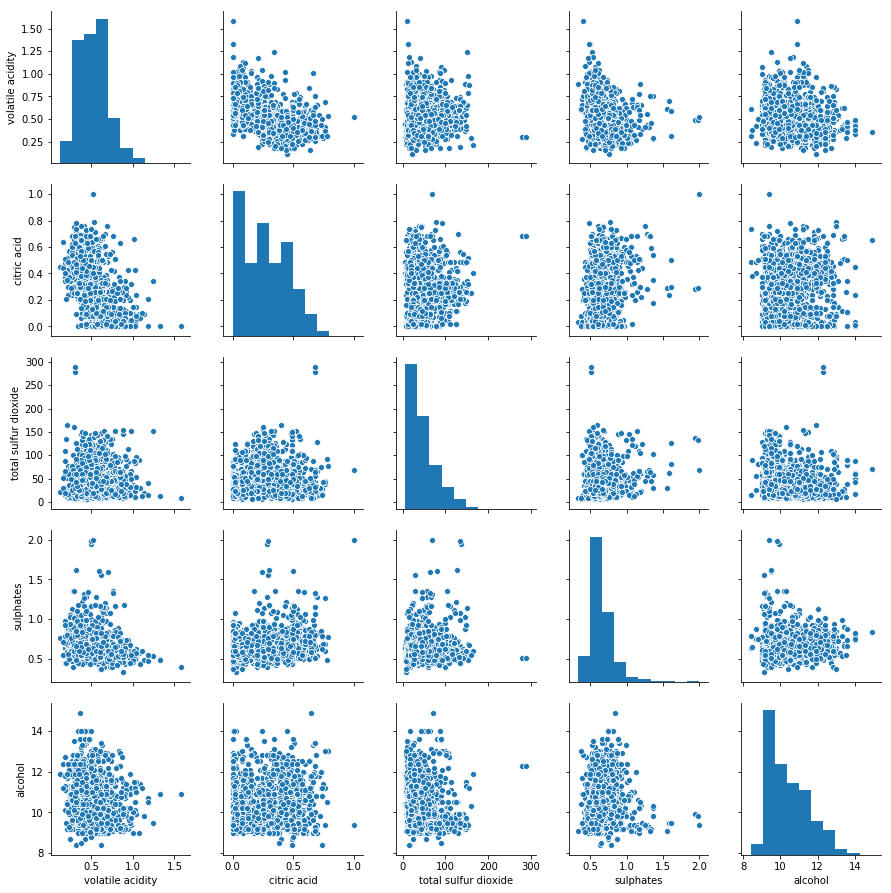

In [18]:
# Checking the distribution of the feature variables and the correlation between them 
axes = sns.pairplot(X)

The distribution of the Feature Variables:
- Volatile acidity: normally distributed  
- citric acid: tri-modal distribution, skewed right   
- total sulfur dioxide: skewed right
- sulphates: normal distribution, Leptokurtic  
- alcohol: skewed right

_Question: Why does this matter?_ 

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


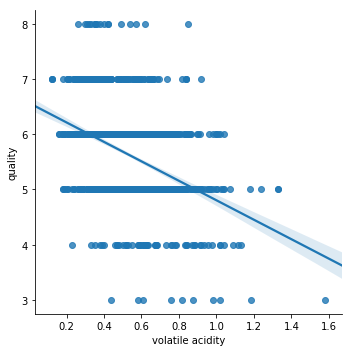

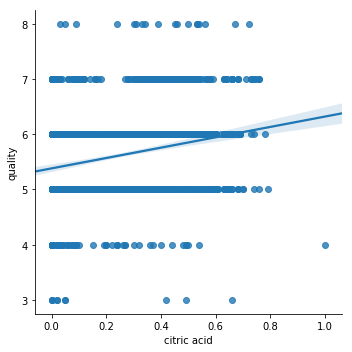

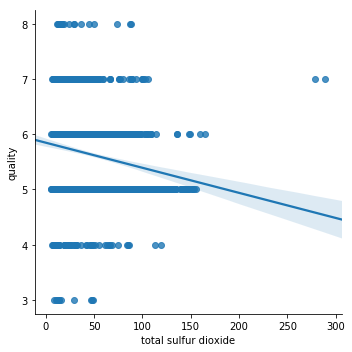

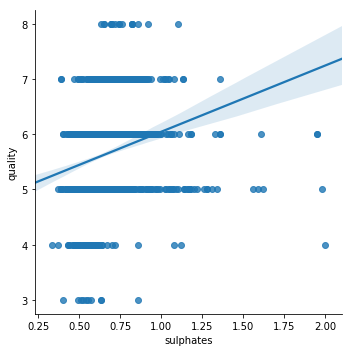

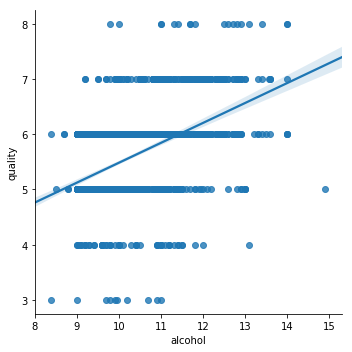

In [19]:
# Visualizing correlations between feature vars and target var with sns.lmplot
sns.lmplot(x="volatile acidity", y='quality', data=wine_df)
sns.lmplot(x="citric acid", y='quality', data=wine_df)
sns.lmplot(x='total sulfur dioxide', y='quality', data=wine_df)
sns.lmplot(x="sulphates", y='quality', data=wine_df)
sns.lmplot(x="alcohol", y='quality', data=wine_df)


The feature variables look to be only slightly linearly correlated with the target variable. 

In [46]:
wine_df.loc[:,'quality'].value_counts().sort_values(axis=0)

3     10
8     18
4     53
7    199
6    638
5    681
Name: quality, dtype: int64

# Summary 
- The data set has 1599 rows and 12 attributes   
- Of the twelve attributes, the Target Variable is _quality_.  
- The feature variables determined to be correlated with the target variable are  _volatile acidity, citric acid, total sulfur dioxide, sulfates, and alcohol_.  
- The dataset does not have any null values
- The variable _total sulphur dioxide_ contains a few outliers with values of over 200. These may effect the model and it would make sense to exclude them from the dataset.   
- Results from the first model show that the training and test R-squared values are both low, meaning the model is __underfitting__ the data.

- Shortcomings in the data include:
    - Pretty large class imbalance in the target variable. There are significantly more 5 and 6s than any other rating.   
    - the target variable is only slightly correlated to feature variables. 
    - the feature variables, 'sulphates' and 'citric acid' have a correlation coefficient of 0.312770, raising the issue of colinearity. 
    

- Things to try to imporve the model:  
    - feature engineering to increase linear correlation between target and feature variables. 
    - eliminate either 'sulphates' or 'citric acid' from the model and see if the r^2 value improves. 
    - eliminate outliers in 'total sulphur dioxide' 
    - make the model more flixible to compensate for the __underfitting__   
    - Try different feature variables and compare the models using MAE< MSE, and RMSE to determine the best set of feature variables. 
    - Consider using K fold cross validation   


- The most appropriate metric to evaluate this model is the R^2 value. 